In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

The following code snippet shows, how you can import a transformer design, which is stored in a json and perform a calculation to estimate the main paramters. The transformer was originally published as a validation example in https://doi.org/10.3390/app10041361

Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.794 s
Magnetic Energy 417.0787016080169
zb, ib: 108.9 ohm 174.95 A
SCI: 7.86 [%]
Bax  [HV] = 84.01 [mT]
Brad [HV] = 32.29 [mT]
Bax  [LV] = 75.48 [mT]
Brad [Lv] = 33.07 [mT]


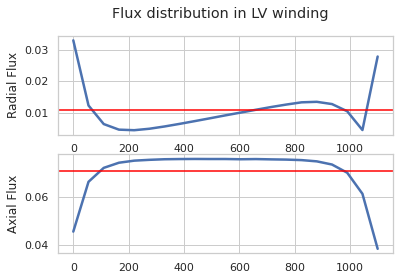

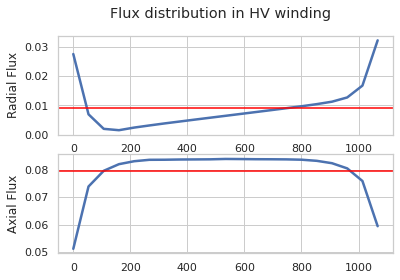

In [2]:
from importlib_resources import files
from src.two_winding_model import TransformerDesign, TwoWindingModel

path = files("data").joinpath("10MVA_example.json")

import json

with open(path) as json_file:
    data = json.load(json_file)

transformer = TransformerDesign.from_dict(data)

trafo_model = TwoWindingModel(input=transformer)
trafo_model.calculate(is_sc=False)

# FEM calculation
trafo_model.fem_simulation()


In [3]:
print(trafo_model.results)

MainResults(wh=1180.0, feasible=True, core_loss=7.7, load_loss=48.10421328729164, copper_mass=0.0, sci=7.53, window_width=199.1, core_mass=7301.5, turn_voltage=46.27, capitalized_cost=0.0, fem_based_sci=7.861748309643092, fem_bax_hv=0.08401411324324243, fem_brad_hv=0.03229454241740903, fem_bax_brad_hv=0.0, fem_bax_lv=0.07548265433933465, fem_brad_lv=0.033067969905474115, fem_bax_brad_lv=0.0)


In [4]:
print(trafo_model.hv_winding)

WindingDesign(inner_radius=315.3, thickness=43.8, winding_height=1067.0, filling_factor=60.0, current_density=2.57, mass=1586.2, dc_loss=25.4, ac_loss=2.0609262841384175, outer_radius=359.1, cable_length=0.0, amper_turns=72064.8)


In [5]:
print(trafo_model.lv_winding)

WindingDesign(inner_radius=230.0, thickness=35.3, winding_height=1100.0, filling_factor=70.0, current_density=2.65, mass=1129.3, dc_loss=19.2, ac_loss=1.4432870031532228, outer_radius=265.3, cable_length=0.0, amper_turns=72029.6)
